 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [318]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [319]:
# Reading whale returns
whale_returns = pd.read_csv("Resources/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = pd.read_csv("Resources/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
#sp500_history = pd.read_csv("Resources/sp500_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [320]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [231]:
# Determining number of nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [232]:
# Use the `dropna` function to drop whole records that have at least one null value
whale_returns.dropna(inplace=True)

In [233]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [234]:
# Count null
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [235]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [236]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data,index_col='Date', parse_dates=True,infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [348]:
# changing close amounts to a float
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")
sp500_df['Close'] = sp500_df['Close'].astype("float")

sp500_df

KeyError: 'Close'

In [247]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

,spClose
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [248]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={'Date': 'Date', 'Close': 'spClose'}, inplace=True)

In [249]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2019-04-22 to 2012-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spClose  1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [250]:
sp500_df.head()

,spClose
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [251]:
sp500_df =sp500_df.pct_change()
sp500_df.head()

,spClose
Date,
2019-04-22,NaN
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394


In [252]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

,spClose
Date,
2019-04-18,-0.884637
2019-04-17,0.559400
2019-04-16,-2.445510
2019-04-15,-1.223394
2019-04-12,-2.237116


## Combine Whale, Algorithmic, and S&P 500 Returns

In [253]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,spClose
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-4.689667
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-1.083090
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,-4.659421
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-1.227713
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,7.980195


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

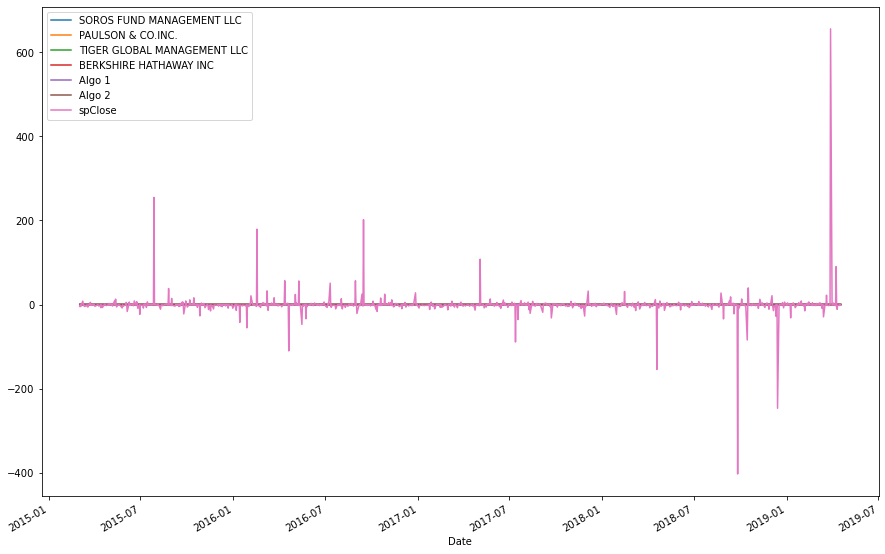

In [254]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

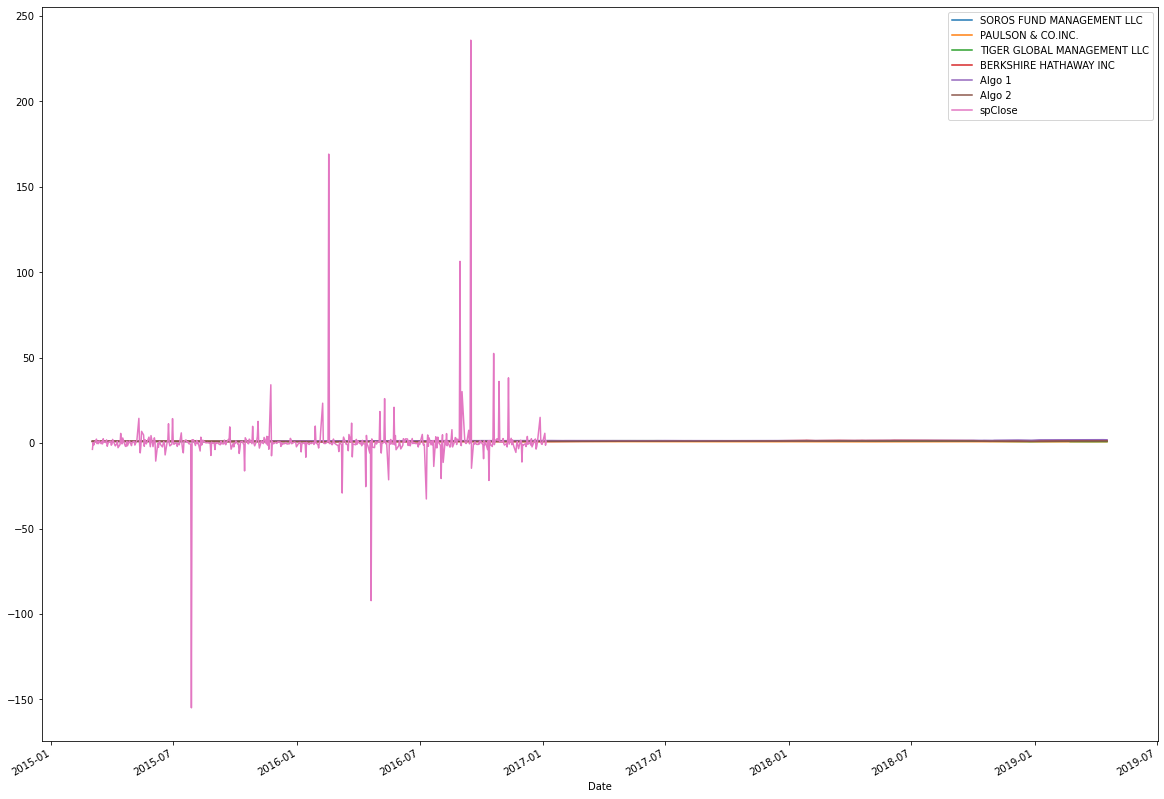

In [255]:
# Calculate cumulative returns of all portfolios
df_cum_daily_returns = (1+ combined_df).cumprod()
#df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns.plot(figsize=(20,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

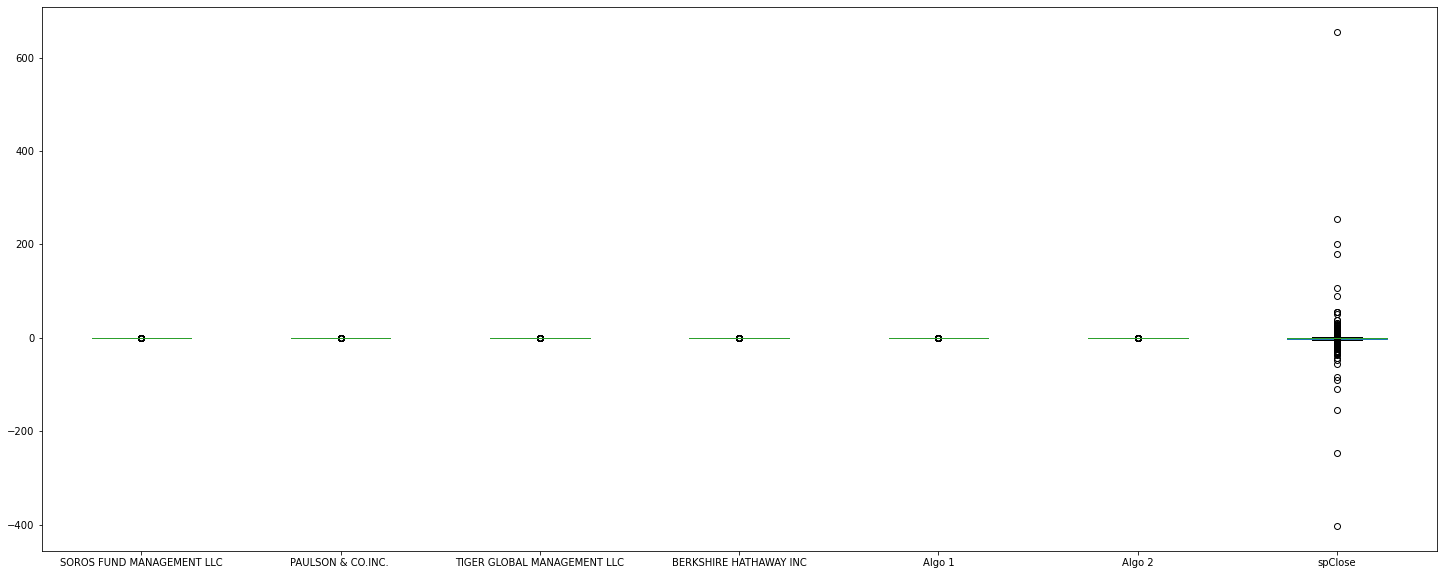

In [256]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [257]:
# Calculate the daily standard deviations of all portfolios
df = pd.DataFrame(combined_df)
answer= df.std()

In [258]:
answer.head()

SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007025
TIGER GLOBAL MANAGEMENT LLC    0.010902
BERKSHIRE HATHAWAY INC         0.012925
Algo 1                         0.007626
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [259]:
# Calculate  the daily standard deviation of S&P 500
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007025
TIGER GLOBAL MANAGEMENT LLC    0.010902
BERKSHIRE HATHAWAY INC         0.012925
Algo 1                         0.007626
Algo 2                         0.008345
spClose                             NaN
dtype: float64

In [337]:
# Determine which portfolios are riskier than the S&P 500
after review there looks to be two Portfolios that are riskier than the S&P 500. Tiger Global Management(0.0109) and Berkshire Hathaway(0.0130) have higher
standard deviations than the S&P(0.009)

SyntaxError: invalid syntax (<ipython-input-337-ef602295ec72>, line 2)

### Calculate the Annualized Standard Deviation

In [261]:
# Calculate the annualized standard deviation (252 trading days)
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125401
PAULSON & CO.INC.              0.111525
TIGER GLOBAL MANAGEMENT LLC    0.173064
BERKSHIRE HATHAWAY INC         0.205176
Algo 1                         0.121065
Algo 2                         0.132472
spClose                             NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [262]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,spClose
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-12,0.006775,0.006272,0.007568,0.009307,0.005339,0.007479,143.939923
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,143.454620
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,143.473739


<AxesSubplot:xlabel='Date'>

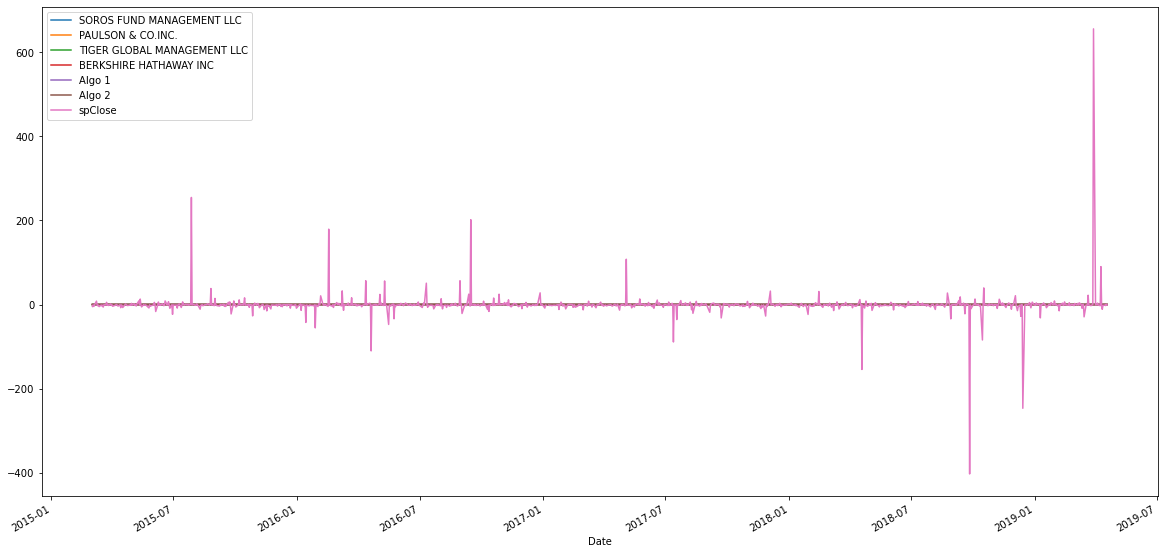

In [263]:
# Plot the rolling standard deviation
combined_df.plot(figsize=(20,10))

### Calculate and plot the correlation

In [264]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,spClose
SOROS FUND MANAGEMENT LLC,1.000000,0.699869,0.560992,0.754166,0.320920,0.826717,0.048078
PAULSON & CO.INC.,0.699869,1.000000,0.434227,0.545605,0.268766,0.678186,0.047996
TIGER GLOBAL MANAGEMENT LLC,0.560992,0.434227,1.000000,0.424111,0.164124,0.507121,0.060394
BERKSHIRE HATHAWAY INC,0.754166,0.545605,0.424111,1.000000,0.291681,0.687752,0.035994
Algo 1,0.320920,0.268766,0.164124,0.291681,1.000000,0.287862,0.033237
Algo 2,0.826717,0.678186,0.507121,0.687752,0.287862,1.000000,0.048798
spClose,0.048078,0.047996,0.060394,0.035994,0.033237,0.048798,1.000000


<AxesSubplot:>

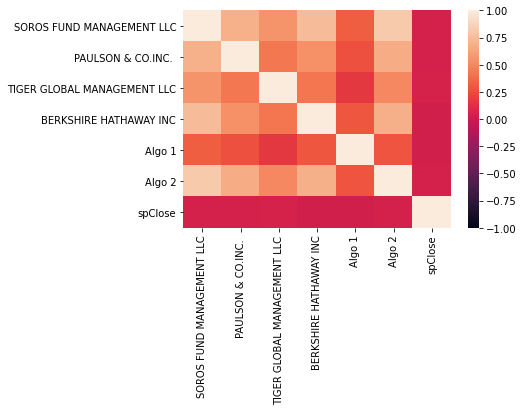

In [265]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [290]:
# Calculate covariance of a single portfolio
covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['spClose'])
covariance

nan

In [279]:
# Calculate variance of S&P 500
variance = combined_df['spClose'].var()
variance

nan

In [280]:
# Computing beta
BERK_beta = covariance / variance
BERK_beta

nan

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

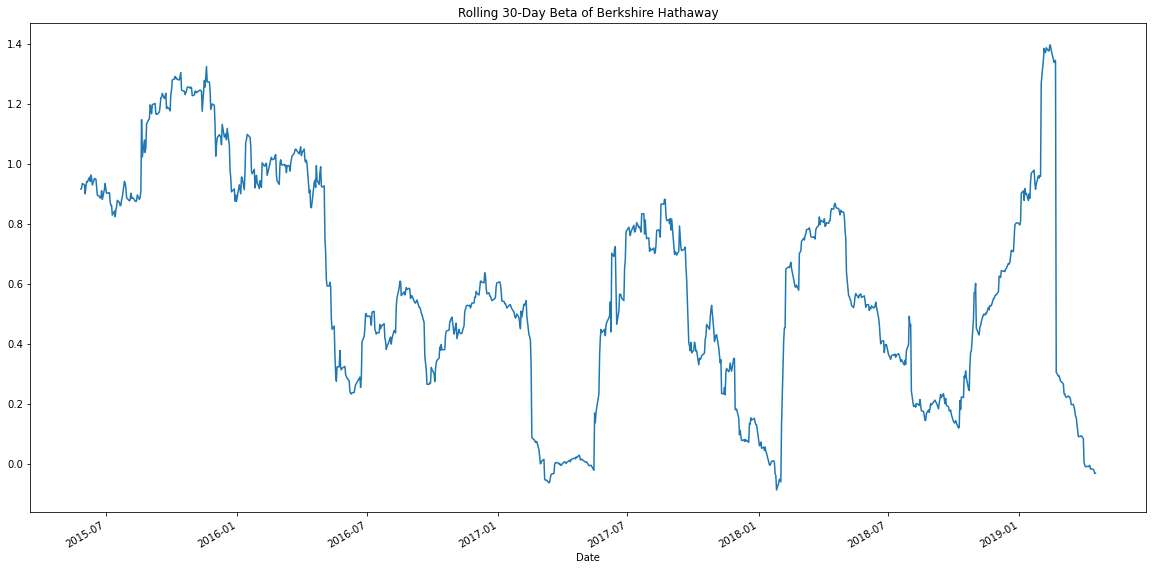

In [282]:
# Plot beta trend
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['TIGER GLOBAL MANAGEMENT LLC'])
rolling_variance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Berkshire Hathaway')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

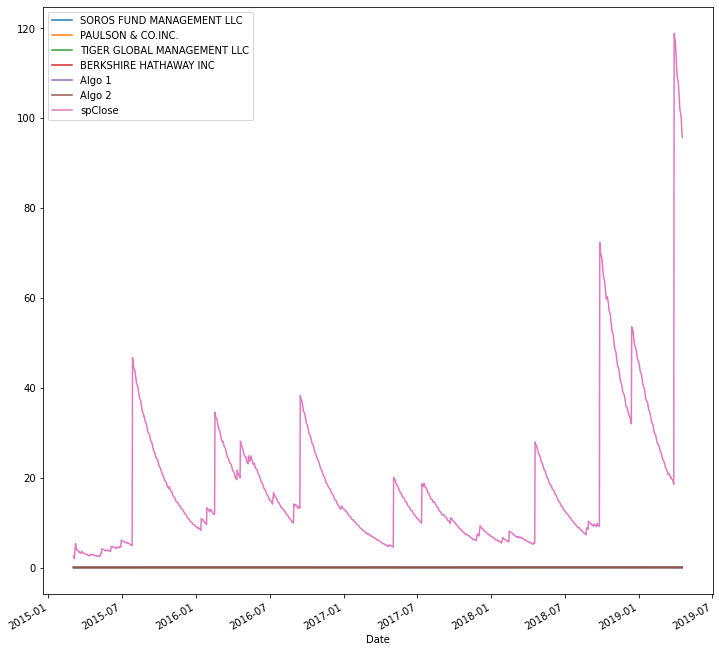

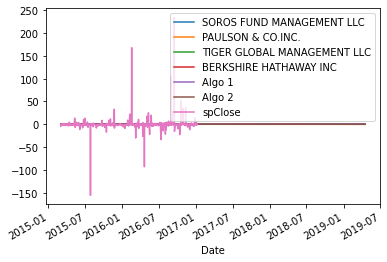

In [288]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(12,12))
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [291]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.348070
PAULSON & CO.INC.             -0.475985
TIGER GLOBAL MANAGEMENT LLC   -0.125164
BERKSHIRE HATHAWAY INC         0.608321
Algo 1                         1.368893
Algo 2                         0.488120
spClose                             NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

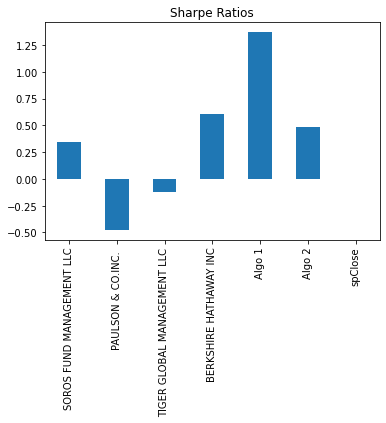

In [292]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [299]:
# Reading data from 1st stock
goog_historical = pd.read_csv("./Resources/goog_historical.csv")
goog_historical

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,GOOG,5/17/2018,1078.59
246,GOOG,5/16/2018,1081.77
247,GOOG,5/15/2018,1079.23
248,GOOG,5/14/2018,1100.20


In [301]:
# Reading data from 2nd stock
aapl_historical = pd.read_csv("./Resources/aapl_historical.csv")
aapl_historical

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
...,...,...,...
245,AAPL,5/17/2018,186.99
246,AAPL,5/16/2018,188.18
247,AAPL,5/15/2018,186.44
248,AAPL,5/14/2018,188.15


In [302]:
# Reading data from 3rd stock
cost_historical = pd.read_csv("./Resources/aapl_historical.csv")
cost_historical

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75
...,...,...,...
245,AAPL,5/17/2018,186.99
246,AAPL,5/16/2018,188.18
247,AAPL,5/15/2018,186.44
248,AAPL,5/14/2018,188.15


In [303]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([cost_historical, aapl_historical, goog_historical], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75


In [351]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75


In [336]:
# Reorganize portfolio data by having a column per symbol

In [357]:
# Calculate daily returns
daily_returns = combined_df.astype
daily_returns








<bound method NDFrame.astype of     Symbol Trade DATE    NOCP Symbol Trade DATE    NOCP Symbol Trade DATE  \
0     AAPL   5/9/2019  200.72   AAPL   5/9/2019  200.72   AAPL   5/9/2019   
1     AAPL   5/8/2019  202.90   AAPL   5/8/2019  202.90   AAPL   5/8/2019   
2     AAPL   5/7/2019  202.86   AAPL   5/7/2019  202.86   AAPL   5/7/2019   
3     AAPL   5/6/2019  208.48   AAPL   5/6/2019  208.48   AAPL   5/6/2019   
4     AAPL   5/3/2019  211.75   AAPL   5/3/2019  211.75   AAPL   5/3/2019   
..     ...        ...     ...    ...        ...     ...    ...        ...   
245   AAPL  5/17/2018  186.99   AAPL  5/17/2018  186.99   AAPL  5/17/2018   
246   AAPL  5/16/2018  188.18   AAPL  5/16/2018  188.18   AAPL  5/16/2018   
247   AAPL  5/15/2018  186.44   AAPL  5/15/2018  186.44   AAPL  5/15/2018   
248   AAPL  5/14/2018  188.15   AAPL  5/14/2018  188.15   AAPL  5/14/2018   
249   AAPL  5/11/2018  188.59   AAPL  5/11/2018  188.59   AAPL  5/11/2018   

       NOCP  
0    200.72  
1    202.90  
2

In [323]:
# Drop NAs
combined_df.dropna()
combined_df.head()


# Display sample data

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [377]:
# Set weights
weights = [0.33, 0.33, 0.33]
portfolio_returns = daily_returns.dot(weights)

custom = pd.DataFrame(portfolio_returns)
custom.head()

AttributeError: 'function' object has no attribute 'dot'

In [376]:
# Calculate portfolio return
combined_df1 = pd.concat([daily_returns], axis='columns', join='inner')
combined_df1.rename(columns= {0: "combined_df"},inplace = True )
combined_df1.dropna(inplace=True)
combined_df1.sort_index()
combined_df1.head()

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid

In [315]:
# Display sample data

ValueError: Dot product shape mismatch, (250, 9) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [378]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([cost_historical, aapl_historical, goog_historical], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75,AAPL,5/3/2019,211.75


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [364]:
# Calculate the annualized `std`
combined_df.std()
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

NOCP    340.293451
NOCP    340.293451
NOCP    340.293451
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

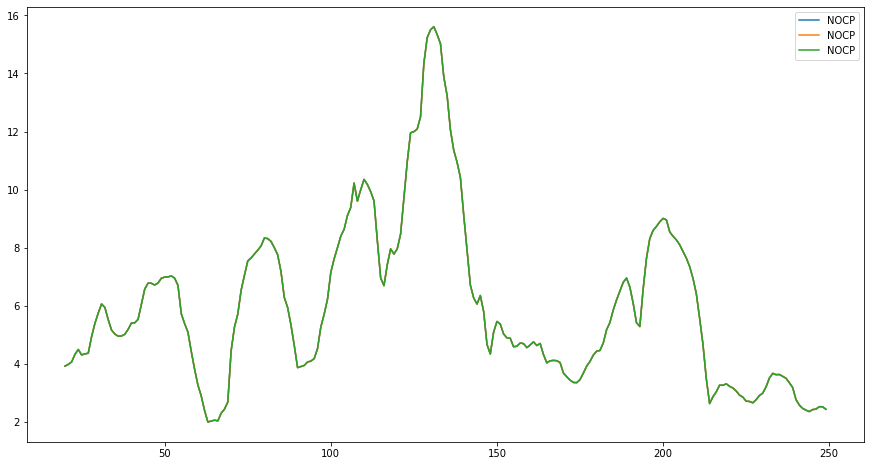

In [365]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(15,8))



### Calculate and plot the correlation

In [371]:
# Calculate and plot the correlation
correlation = combined_df.corr()
correlation

,NOCP,NOCP,NOCP
NOCP,1.0,1.0,1.0
NOCP,1.0,1.0,1.0
NOCP,1.0,1.0,1.0


<AxesSubplot:>

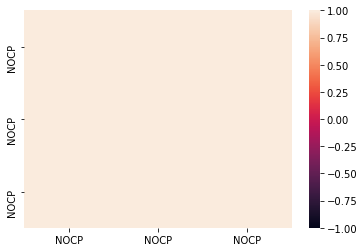

In [367]:
sns.heatmap(correlation, vmin=-1, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [375]:
# Calculate and plot Beta
# Calculate 60-day rolling variance of S&P 500
rolling_goog_covariance = daily_returns['FB'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_aapl_covariance = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_cost_covariance = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['S&P 500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_fb_beta = rolling_fb_covariance / rolling_variance
rolling_twtr_beta = rolling_twtr_covariance / rolling_variance
rolling_snap_beta = rolling_snap_covariance / rolling_variance
rolling_snap_beta



TypeError: 'method' object is not subscriptable

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [372]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_all = (combined_df.mean() * 252) / ((combined_df).std() * np.sqrt(252))
sharpe_ratios_all

NOCP    141.987456
NOCP    141.987456
NOCP    141.987456
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

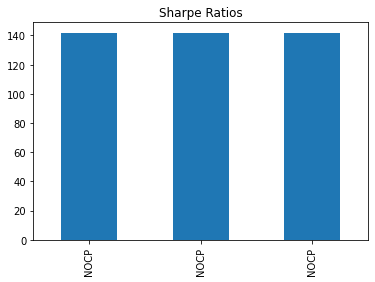

In [373]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!